In [156]:
import numpy as np
import pandas as pd
import sys, os
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# from configs.config import SET_SEED, SEED, DATASET_PATH
# from descriptor_selection.utils import MolecularFeatureExtractor
# import deepchem as dc

In [157]:
df = pd.read_csv(r'.\datasets\solubility_only.csv')
df

,Compound ID,InChIKey,SMILES,VALUE
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392
3,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120
4,C1716,FTQWRYSLUYAIRQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)NCNC(=O)CCCCCCCCCCCCCCCCC,-14.939865
...,...,...,...,...
9909,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000
9910,C1665,HDZGCSFEDULWCS-UHFFFAOYSA-N,CNN,1.340000
9911,C1666,OKKJLVBELUTLKV-UHFFFAOYSA-N,CO,1.570000
9912,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000


In [42]:
df.drop_duplicates(subset = ['SMILES'], keep='first')

,Compound ID,InChIKey,SMILES,VALUE
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392
3,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120
4,C1716,FTQWRYSLUYAIRQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)NCNC(=O)CCCCCCCCCCCCCCCCC,-14.939865
...,...,...,...,...
9909,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000
9910,C1665,HDZGCSFEDULWCS-UHFFFAOYSA-N,CNN,1.340000
9911,C1666,OKKJLVBELUTLKV-UHFFFAOYSA-N,CO,1.570000
9912,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000


In [43]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# dataset_vp = 'scgas'
# dataset_vp = pd.read_csv(f'..\datasets\{dataset_vp}.csv')

# save_dir = r'..\results_figure\boxplot'

In [45]:
df = pd.read_csv(r'.\datasets\solubility_only.csv')
df

,Compound ID,InChIKey,SMILES,VALUE
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392
3,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120
4,C1716,FTQWRYSLUYAIRQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)NCNC(=O)CCCCCCCCCCCCCCCCC,-14.939865
...,...,...,...,...
9909,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000
9910,C1665,HDZGCSFEDULWCS-UHFFFAOYSA-N,CNN,1.340000
9911,C1666,OKKJLVBELUTLKV-UHFFFAOYSA-N,CO,1.570000
9912,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000


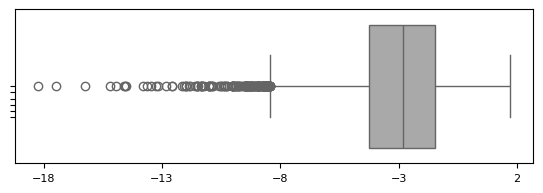

In [46]:
y = 'VALUE'

fig = plt.figure(figsize=(6.69, 2.0))
ax1 = fig.add_subplot(111)

sns.boxplot(x=df[y], color='darkgray')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(range(df['VALUE'].min().astype(int), df['VALUE'].max().astype(int)+5, 5))
ax1.set_yticks(np.arange(0, 0.22, 0.04))
ax1.tick_params(axis='both', labelsize=8)

# # 저장
# file_name = '6.pdf'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi=300, bbox_inches = "tight")

plt.show()

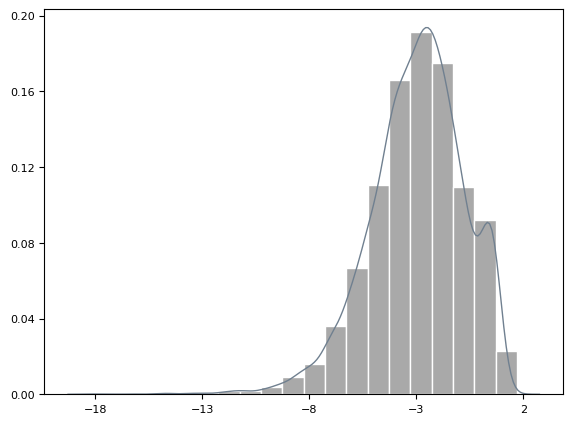

In [47]:
fig = plt.figure(figsize=(6.69, 5.0))
ax1 = fig.add_subplot(111)

sns.histplot(df['VALUE'], color = 'darkgray', edgecolor='white', bins=20,  alpha = 1, stat='density')
sns.kdeplot(df['VALUE'], ax=ax1, linewidth=1.0, color='slategray')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(range(df['VALUE'].min().astype(int), df['VALUE'].max().astype(int)+5, 5))
ax1.set_yticks(np.arange(0, 0.22, 0.04))
ax1.tick_params(axis='both', labelsize=8)

# # 저장
# file_name = '5.pdf'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi=300, bbox_inches = "tight")

plt.show()

In [48]:
import pandas as pd

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower) & (df[col] <= upper)]


In [49]:
Q1 = df['VALUE'].quantile(0.25)
Q3 = df['VALUE'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [50]:
len(df['VALUE'] <= lower)

9914

In [ ]:
df_new = df.loc[(df['VALUE'] >= lower) & (df['VALUE'] <= upper)].reset_index(drop=True)
df_new = df_new.drop(columns = ['Compound ID', 'InChIKey'])
df_new = df_new.rename(columns={'SMILES': 'smiles', 'VALUE': 'solubility'})


In [56]:
df_new.to_csv('solubility.csv', index = False)

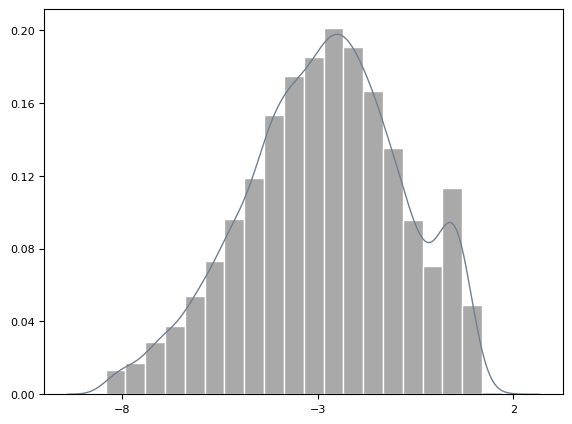

In [57]:
fig = plt.figure(figsize=(6.69, 5.0))
ax1 = fig.add_subplot(111)

sns.histplot(df_new['solubility'], color = 'darkgray', edgecolor='white', bins=20,  alpha = 1, stat='density')
sns.kdeplot(df_new['solubility'], ax=ax1, linewidth=1.0, color='slategray')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(range(df_new['solubility'].min().astype(int), df_new['solubility'].max().astype(int)+5, 5))
ax1.set_yticks(np.arange(0, 0.22, 0.04))
ax1.tick_params(axis='both', labelsize=8)

# # 저장
# file_name = '5.pdf'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi=300, bbox_inches = "tight")

plt.show()

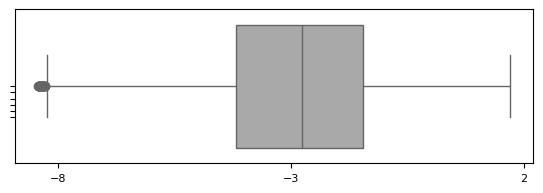

In [58]:
y = 'VALUE'

fig = plt.figure(figsize=(6.69, 2.0))
ax1 = fig.add_subplot(111)

sns.boxplot(x=df_new['solubility'], color='darkgray')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(range(df_new['solubility'].min().astype(int), df_new['solubility'].max().astype(int)+5, 5))
ax1.set_yticks(np.arange(0, 0.22, 0.04))
ax1.tick_params(axis='both', labelsize=8)

# # 저장
# file_name = '6.pdf'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi=300, bbox_inches = "tight")

plt.show()

In [205]:
import torch
import torch.nn.functional as F
batch_size = 32
hg = torch.randn(batch_size ,20)
A = torch.randn(20, 50)
self_feat = torch.randn(batch_size, 50)

# hg = hg.unsqueeze(2)
# self_feat = self_feat.unsqueeze(1)
# hg = torch.bmm(hg, self_feat)
# hg = hg.view(hg.size(0), -1)

In [159]:
hg1 = hg.unsqueeze(2)
hg1.shape

torch.Size([32, 20, 1])

In [160]:
self_feat1 = self_feat.unsqueeze(1)
self_feat1.shape

torch.Size([32, 1, 50])

In [161]:
re1 = torch.bmm(hg1, self_feat1)
re1.shape

torch.Size([32, 20, 50])

In [162]:
re1.view(hg.size(0), -1).shape

torch.Size([32, 1000])

In [163]:
W = torch.randn(20, 50)
projected = torch.matmul(hg, W)
projected.shape

torch.Size([32, 50])

In [164]:
hg1 = hg.unsqueeze(2)
hg1.shape

torch.Size([32, 20, 1])

In [165]:
self_feat1 = self_feat.unsqueeze(1)
self_feat1.shape

torch.Size([32, 1, 50])

In [166]:
A = torch.bmm(hg1, self_feat1)
A.shape

torch.Size([32, 20, 50])

In [167]:
A_weighted = A * W
A_weighted.shape

torch.Size([32, 20, 50])

In [168]:
A_weighted.view(hg.size(0), -1).shape

torch.Size([32, 1000])

In [206]:
import torch
import torch.nn.functional as F
batch_size = 32
hg = torch.randn(batch_size ,20)
A = torch.randn(20, 50)
self_feat = torch.randn(batch_size, 50)

In [198]:
score = (hg @ A) * self_feat

In [200]:
alpha = F.softmax(score, dim = 1)
alpha.shape

torch.Size([32, 50])

In [204]:
desc_summary = alpha * self_feat
desc_summary

tensor([[-4.5772e-09, -1.8203e-09, -2.9478e-09,  ...,  2.5746e-08,
          1.6034e-09,  1.5253e-09],
        [ 2.7835e-02,  1.7235e-05,  1.1781e-04,  ...,  3.1145e-03,
          2.1715e-04,  1.3484e-01],
        [ 6.7587e-15, -1.3111e-12, -3.5528e-14,  ..., -2.6241e-14,
          2.9409e-15, -2.0509e-14],
        ...,
        [ 5.3387e-06,  2.5782e-01,  2.0684e-03,  ..., -7.4680e-07,
          2.5357e-06, -2.1369e-06],
        [-2.7168e+00, -9.1995e-06,  2.3427e-07,  ...,  8.1529e-07,
         -2.7054e-06,  4.5379e-06],
        [-7.9997e-07,  6.0313e-06, -2.3433e-07,  ...,  4.7487e-05,
         -9.1788e-08,  1.6536e-06]])

In [208]:
torch.matmul(self_feat, A.T).shape

torch.Size([32, 20])